## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

data_dic = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')

data_dic

## Problem Statement

In [2]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
df.shape

(99999, 226)

In [4]:
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
null_perc = 100 * df.isnull().mean()

In [6]:
null_perc

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

In [7]:
null_40 = null_perc[null_perc>40]
null_40

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

In [8]:
need_to_drop = null_40.index

df.drop(columns = need_to_drop, inplace = True)

df.shape

(99999, 186)

In [9]:
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 


['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [10]:
df=df.drop(date_cols,axis=1)

In [11]:
df.shape

(99999, 178)

In [12]:
# Step 1: Calculate the average recharge amount for the first two months
df['avg_rech_amt'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2

# Step 2: Find the 70th percentile of the average recharge amounts
X = np.percentile(df['avg_rech_amt'], 70)

In [13]:
X

368.5

In [14]:
df = df[df['avg_rech_amt'] >= X]
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [15]:
df.shape

(30011, 179)



We can see that we have around *~30K* rows after filtering



Handling missing values in rows

In [16]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape


(114, 179)

In [17]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

(29897, 179)

In [18]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
spl_og_mou_9,5.32
loc_og_t2t_mou_9,5.32
std_og_t2f_mou_9,5.32
loc_ic_mou_9,5.32
loc_ic_t2m_mou_9,5.32
...,...
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00




Looks like MOU for all the types of calls for the month of (9) have missing values together for any particular record.

Lets check the records for the MOU for (9), in which these coulmns have missing values together.


In [19]:
# Listing the columns of MOU (9)
print(((df_missing_columns[df_missing_columns['null'] == 5.32]).index).to_list())

['spl_og_mou_9', 'loc_og_t2t_mou_9', 'std_og_t2f_mou_9', 'loc_ic_mou_9', 'loc_ic_t2m_mou_9', 'roam_og_mou_9', 'std_ic_t2f_mou_9', 'std_og_t2m_mou_9', 'std_ic_t2m_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2f_mou_9', 'loc_og_t2m_mou_9', 'std_og_t2t_mou_9', 'loc_og_t2f_mou_9', 'std_ic_t2t_mou_9', 'loc_og_mou_9', 'std_ic_t2o_mou_9', 'roam_ic_mou_9', 'offnet_mou_9', 'std_og_mou_9', 'ic_others_9', 'isd_og_mou_9', 'isd_ic_mou_9', 'og_others_9', 'spl_ic_mou_9', 'loc_og_t2c_mou_9', 'onnet_mou_9', 'std_ic_mou_9', 'std_og_t2c_mou_9']


In [20]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,109,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,109,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,109,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,109,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [21]:
df_null_mou_9.shape

(1590, 179)

In [22]:
# Deleting the records for which MOU for (9) are null
df = df.drop(df_null_mou_9.index)

In [23]:
# Again Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
ic_others_8,0.55
spl_og_mou_8,0.55
loc_ic_t2f_mou_8,0.55
std_og_t2t_mou_8,0.55
loc_ic_t2m_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00




Looks like MOU for all the types of calls for the month of  (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.


In [24]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.55]).index).to_list())

['ic_others_8', 'spl_og_mou_8', 'loc_ic_t2f_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2t_mou_8', 'og_others_8', 'loc_og_t2m_mou_8', 'isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_t2f_mou_8', 'std_og_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2c_mou_8', 'std_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'std_ic_t2t_mou_8', 'offnet_mou_8', 'std_ic_t2m_mou_8', 'isd_ic_mou_8', 'std_ic_t2f_mou_8', 'onnet_mou_8', 'spl_ic_mou_8', 'std_ic_t2o_mou_8']


In [25]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
375,7002252754,109,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,109,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
788,7000636808,109,0.0,0.0,0.0,532.742,546.756,0.0,269.274,1173.39,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
1802,7000516213,109,0.0,0.0,0.0,810.455,0.000,0.0,0.000,91.33,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5
4837,7002192662,109,0.0,0.0,0.0,649.150,149.572,0.0,0.250,1354.24,...,0,0,0,0,520,0.0,0.0,0.0,0.0,421.0


In [26]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [27]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_t2f_mou_6,0.44
loc_og_t2t_mou_6,0.44
loc_og_t2f_mou_6,0.44
loc_og_t2c_mou_6,0.44
loc_og_mou_6,0.44
...,...
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00
std_og_t2c_mou_9,0.00


Looks like MOU for all the types of calls for the month of Jun (6) have missing values together for any particular record.

Lets check the records for the MOU for Jun(6), in which these coulmns have missing values together.


In [28]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

['loc_ic_t2f_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'ic_others_6', 'loc_ic_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'spl_ic_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'loc_og_t2m_mou_6', 'std_og_t2c_mou_6', 'roam_og_mou_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6']


In [29]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
77,7001328263,109,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,109,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423,7000635248,109,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
934,7002152278,109,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
1187,7000486275,109,0.0,0.0,0.0,0.000,757.170,995.719,0.000,NaN,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [30]:
# Deleting the records for which MOU for Jun(6) are null
df = df.drop(df_null_mou_6.index)

In [31]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
std_og_t2m_mou_7,0.12
loc_og_t2t_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
isd_og_mou_9,0.00
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00




Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for Jul(7), in which these coulmns have missing values together.


In [32]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

['std_og_t2m_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'isd_ic_mou_7', 'spl_og_mou_7', 'spl_ic_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_og_mou_7', 'roam_ic_mou_7', 'offnet_mou_7', 'onnet_mou_7']


In [33]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
5616,7001238202,109,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,...,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,109,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,...,0,0,0,0,672,0.00,0.0,0.0,0.00,603.0
9955,7001658068,109,0.0,0.0,0.0,925.028,189.000,789.761,445.707,46.39,...,0,0,0,0,3107,0.00,0.0,0.0,0.00,692.5
10724,7001391499,109,0.0,0.0,0.0,894.818,85.000,207.040,363.314,117.21,...,0,0,0,0,2664,0.00,0.0,0.0,0.00,510.0
12107,7000131738,109,0.0,0.0,0.0,1803.475,0.000,0.600,25.243,1742.61,...,0,0,0,0,219,0.00,0.0,0.0,0.00,995.0


In [34]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [35]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_6,0.0
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0




We can see there are no more missing values in any columns.


In [36]:
df.shape

(27991, 179)

In [37]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df.index)/30011)),2)

0.07

In [38]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [39]:
df['churn'].value_counts()

0    27042
1      949
Name: churn, dtype: int64

In [40]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,churn
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


In [41]:
df.shape

(27991, 180)

In [42]:
df['churn'].value_counts()

0    27042
1      949
Name: churn, dtype: int64

In [43]:
df.dtypes.value_counts()

float64    144
int64       35
int32        1
dtype: int64

In [44]:
col_9 = [col for col in df.columns.to_list() if '_9' in col ]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [45]:
df = df.drop(col_9, axis=1)

In [46]:
df.shape

(27991, 138)

# Deriving New Features

In [47]:
# Total mou of 6 month as good phase incoming and outgoing
df['total_mou_good_6'] = (df['total_og_mou_6'] + df['total_ic_mou_6'])

In [48]:
# Total mou at 7 month as good phase incoming and outgoing
df['total_mou_good_7'] = (df['total_og_mou_7'] + df['total_ic_mou_7'])

In [49]:
# Total mou of good phase 6 + 7
df['total_mou_good'] = df['total_mou_good_6'] + df['total_mou_good_7']

In [50]:
df['avg_total_mou_action'] = (df['total_og_mou_8'] + df['total_ic_mou_8']).mean()

In [51]:
# Difference total_mou_good and total_mou_action
df['diff_mou'] = df['avg_total_mou_action'] - df['total_mou_good']

In [52]:
# Checking whether the mou has decreased in action phase
df['decrease_mou_action'] = np.where((df['diff_mou'] < 0), 1, 0)

In [53]:
df.head(-1)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,churn,total_mou_good_6,total_mou_good_7,total_mou_good,avg_total_mou_action,diff_mou,decrease_mou_action
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,122.16,0.0,519.0,0,612.22,460.15,1072.37,964.697183,-107.672817,1
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,0.00,0.0,380.0,0,1875.70,364.99,2240.69,964.697183,-1275.992817,1
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,21.89,0.0,459.0,0,711.67,667.57,1379.24,964.697183,-414.542817,1
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,0.00,0.0,408.0,0,1341.41,3.12,1344.53,964.697183,-379.832817,1
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,0.00,0.0,640.0,0,1067.43,1160.68,2228.11,964.697183,-1263.412817,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99965,7000519799,109,0.0,0.0,0.0,292.930,641.110,303.172,18.43,99.61,...,0.00,0.0,536.0,0,544.40,1349.71,1894.11,964.697183,-929.412817,1
99970,7001386760,109,0.0,0.0,0.0,261.269,410.614,290.851,5.01,142.59,...,0.00,0.0,392.0,0,313.47,916.41,1229.88,964.697183,-265.182817,1
99974,7001453306,109,0.0,0.0,0.0,414.303,321.093,371.016,17.56,0.00,...,0.00,0.0,465.0,0,569.05,469.82,1038.87,964.697183,-74.172817,1
99986,7001729035,109,0.0,0.0,0.0,644.973,455.228,564.334,806.73,549.36,...,604.08,0.0,848.5,0,2181.52,1805.49,3987.01,964.697183,-3022.312817,1


In [54]:
df['decrease_mou_action'].value_counts()

1    22718
0     5273
Name: decrease_mou_action, dtype: int64

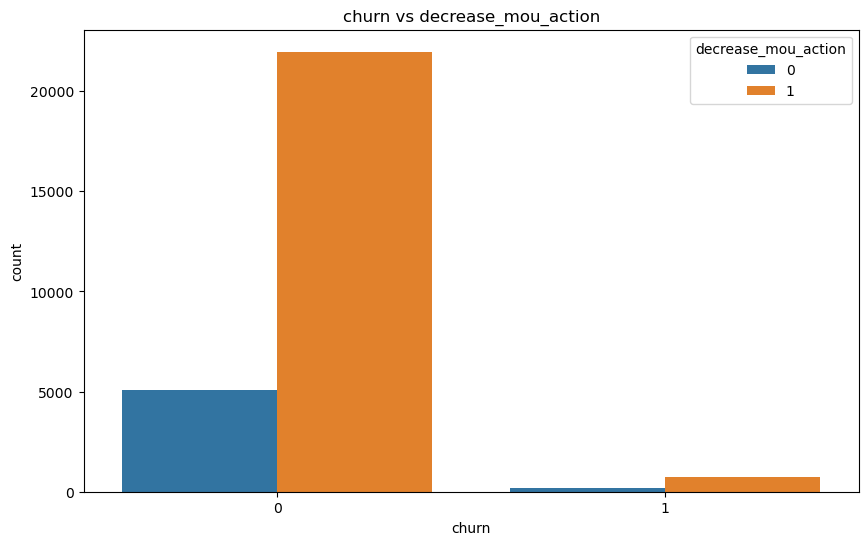

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(df['churn'], hue = df['decrease_mou_action'])
plt.title('churn vs decrease_mou_action')
plt.show()

In [56]:
df['aon']

8         315
13       2607
16        511
17        667
21        720
         ... 
99970    1022
99974    3054
99986    2696
99988     328
99997     478
Name: aon, Length: 27991, dtype: int64

# Deriving new column `tenure`

In [57]:
# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
df['tenure'] = (df['aon']/365).round(0)

# Since we derived a new column from 'aon', we can drop it
#df.drop('aon',axis=1, inplace=True)

In [58]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sep_vbc_3g,avg_rech_amt,churn,total_mou_good_6,total_mou_good_7,total_mou_good,avg_total_mou_action,diff_mou,decrease_mou_action,tenure
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,0.0,519.0,0,612.22,460.15,1072.37,964.697183,-107.672817,1,1.0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,0.0,380.0,0,1875.70,364.99,2240.69,964.697183,-1275.992817,1,7.0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,0.0,459.0,0,711.67,667.57,1379.24,964.697183,-414.542817,1,1.0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,0.0,408.0,0,1341.41,3.12,1344.53,964.697183,-379.832817,1,2.0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,0.0,640.0,0,1067.43,1160.68,2228.11,964.697183,-1263.412817,1,2.0


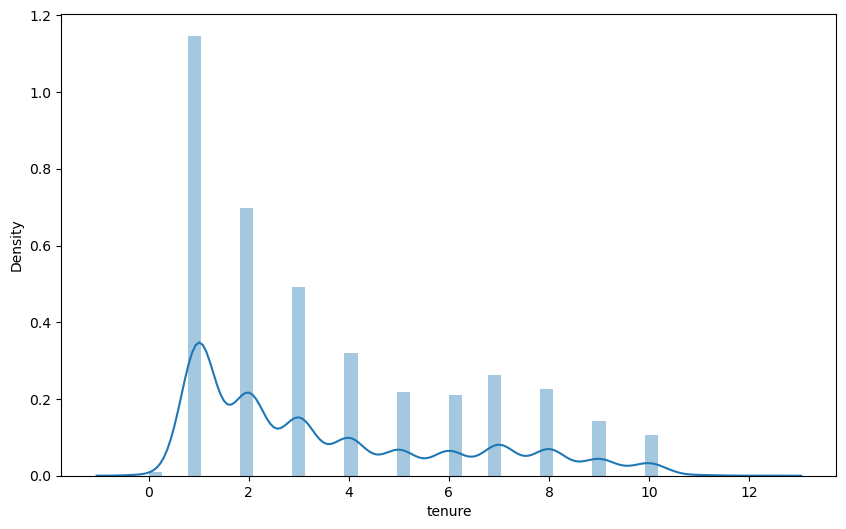

In [59]:
plt.figure(figsize=(10, 6))
sns.distplot(df['tenure'])
plt.show()

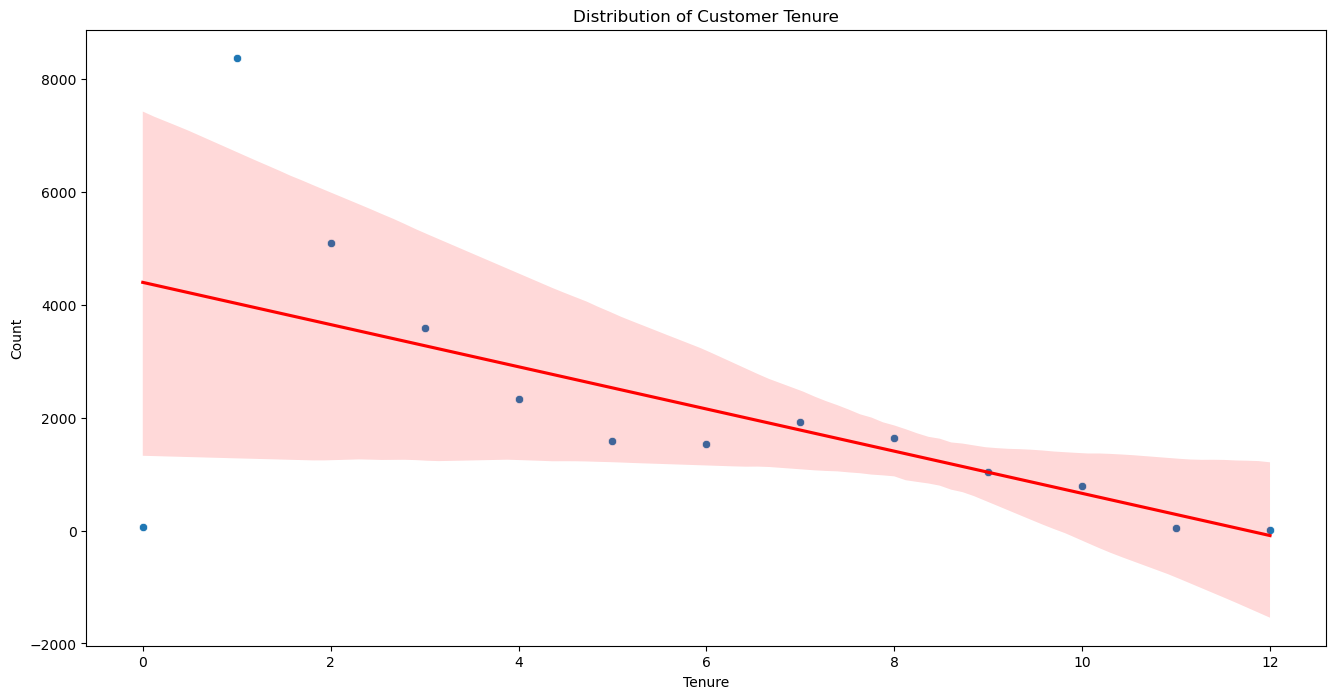

In [60]:
# Create a dataframe with count values for each unique tenure value
tenure_counts = df['tenure'].value_counts().reset_index()
tenure_counts.columns = ['tenure', 'count']
tenure_counts = tenure_counts.sort_values('tenure')

# Plot the scatter plot with trend line
plt.figure(figsize=(16, 8))
sns.scatterplot(data=tenure_counts, x='tenure', y='count')
sns.regplot(data=tenure_counts, x='tenure', y='count', scatter=False, color='red')

# Set plot labels and title
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Customer Tenure')

# Display the plot
plt.show()

Deriving new column Total Revenue

In [61]:
# creating a new variable 'Revenue' 
df['total_revenue_6'] = df['arpu_6'] * df['aon']
df['total_revenue_7'] = df['arpu_7'] * df['aon']
df['total_revenue_8'] = df['arpu_8'] * df['aon']
df['total_revenue'] = df['total_revenue_6'] + df['total_revenue_7'] +df['total_revenue_8']

In [62]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,total_mou_good_7,total_mou_good,avg_total_mou_action,diff_mou,decrease_mou_action,tenure,total_revenue_6,total_revenue_7,total_revenue_8,total_revenue
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,460.15,1072.37,964.697183,-107.672817,1,1.0,119297.115,155050.245,43269.030,317616.390
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,364.99,2240.69,964.697183,-1275.992817,1,7.0,1284849.522,536184.297,1546628.820,3367662.639
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,667.57,1379.24,964.697183,-414.542817,1,1.0,220228.225,153233.059,96013.834,469475.118
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,3.12,1344.53,964.697183,-379.832817,1,2.0,460235.336,12659.660,17007.833,489902.829
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,1160.68,2228.11,964.697183,-1263.412817,1,2.0,370406.160,430382.160,459187.200,1259975.520


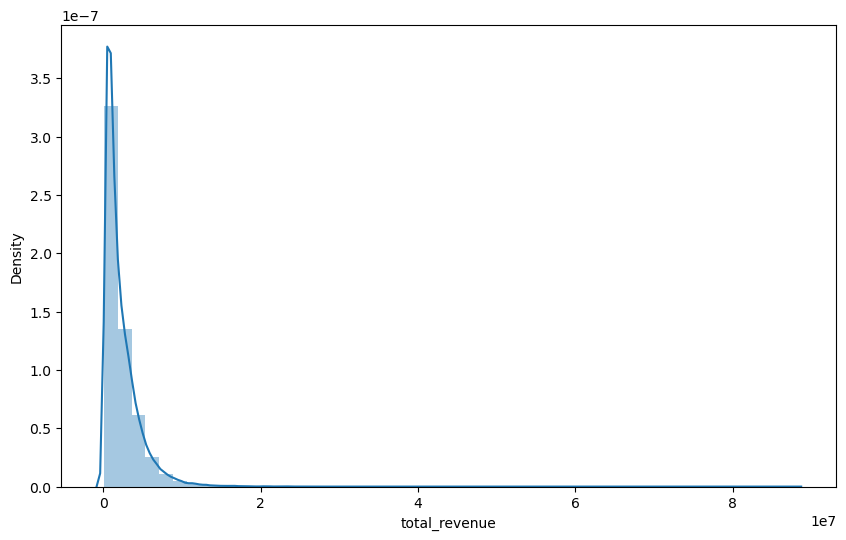

In [63]:
plt.figure(figsize=(10,6))
sns.distplot(df['total_revenue'])
plt.show()

# Deriving new column Recharge Frequency

In [64]:
# Recharge Frequency
df['recharge_frequency'] = df['total_rech_num_6'] + df['total_rech_num_7'] + df['total_rech_num_8']

In [65]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,total_mou_good,avg_total_mou_action,diff_mou,decrease_mou_action,tenure,total_revenue_6,total_revenue_7,total_revenue_8,total_revenue,recharge_frequency
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,1072.37,964.697183,-107.672817,1,1.0,119297.115,155050.245,43269.030,317616.390,54
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,2240.69,964.697183,-1275.992817,1,7.0,1284849.522,536184.297,1546628.820,3367662.639,21
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,1379.24,964.697183,-414.542817,1,1.0,220228.225,153233.059,96013.834,469475.118,18
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,1344.53,964.697183,-379.832817,1,2.0,460235.336,12659.660,17007.833,489902.829,25
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,2228.11,964.697183,-1263.412817,1,2.0,370406.160,430382.160,459187.200,1259975.520,75


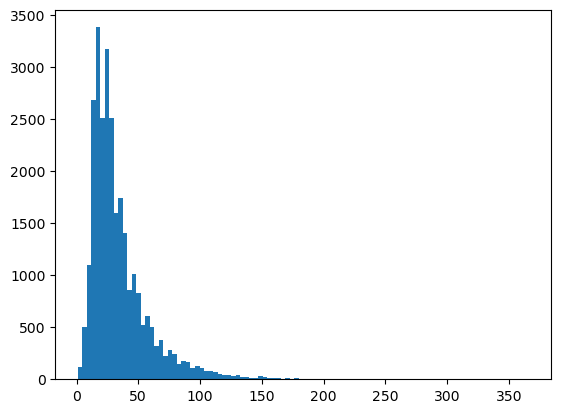

In [66]:
plt.figure()
plt.hist(df['recharge_frequency'], bins=100)
plt.show()

# Deriving new column Total Calls


In [67]:
# Total Calls
df['total_calls'] = df['ic_others_6'] + df['ic_others_7'] + df['ic_others_8'] + df['total_og_mou_6'] + df['total_og_mou_7'] + df['total_og_mou_8']

In [68]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,avg_total_mou_action,diff_mou,decrease_mou_action,tenure,total_revenue_6,total_revenue_7,total_revenue_8,total_revenue,recharge_frequency,total_calls
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,964.697183,-107.672817,1,1.0,119297.115,155050.245,43269.030,317616.390,54,1111.58
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,964.697183,-1275.992817,1,7.0,1284849.522,536184.297,1546628.820,3367662.639,21,2235.92
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,964.697183,-414.542817,1,1.0,220228.225,153233.059,96013.834,469475.118,18,866.20
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,964.697183,-379.832817,1,2.0,460235.336,12659.660,17007.833,489902.829,25,1250.34
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,964.697183,-1263.412817,1,2.0,370406.160,430382.160,459187.200,1259975.520,75,2957.67


# Deriving new column Total Data Usage

In [69]:
# Internet Usage
df['total_data_usage'] = df['vol_2g_mb_6'] + df['vol_2g_mb_7'] + df['vol_2g_mb_8'] + df['vol_3g_mb_6'] + df['vol_3g_mb_7'] + df['vol_3g_mb_8']

In [70]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,diff_mou,decrease_mou_action,tenure,total_revenue_6,total_revenue_7,total_revenue_8,total_revenue,recharge_frequency,total_calls,total_data_usage
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,-107.672817,1,1.0,119297.115,155050.245,43269.030,317616.390,54,1111.58,1118.92
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,-1275.992817,1,7.0,1284849.522,536184.297,1546628.820,3367662.639,21,2235.92,0.02
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,-414.542817,1,1.0,220228.225,153233.059,96013.834,469475.118,18,866.20,0.00
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,-379.832817,1,2.0,460235.336,12659.660,17007.833,489902.829,25,1250.34,0.00
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,-1263.412817,1,2.0,370406.160,430382.160,459187.200,1259975.520,75,2957.67,0.00


In [71]:
skew_data_col = round(df.skew(skipna=True), 2)

for column, skewness in skew_data_col.items():
    if (skewness > 1) or (skewness < -1):
        print(f"Column: {column}, Skewness: {skewness}")

Column: arpu_6, Skewness: 14.54
Column: arpu_7, Skewness: 20.84
Column: arpu_8, Skewness: 17.35
Column: onnet_mou_6, Skewness: 3.99
Column: onnet_mou_7, Skewness: 4.06
Column: onnet_mou_8, Skewness: 4.71
Column: offnet_mou_6, Skewness: 3.53
Column: offnet_mou_7, Skewness: 3.77
Column: offnet_mou_8, Skewness: 5.02
Column: roam_ic_mou_6, Skewness: 11.34
Column: roam_ic_mou_7, Skewness: 17.22
Column: roam_ic_mou_8, Skewness: 18.25
Column: roam_og_mou_6, Skewness: 8.84
Column: roam_og_mou_7, Skewness: 8.98
Column: roam_og_mou_8, Skewness: 14.02
Column: loc_og_t2t_mou_6, Skewness: 9.09
Column: loc_og_t2t_mou_7, Skewness: 10.11
Column: loc_og_t2t_mou_8, Skewness: 13.1
Column: loc_og_t2m_mou_6, Skewness: 4.16
Column: loc_og_t2m_mou_7, Skewness: 3.86
Column: loc_og_t2m_mou_8, Skewness: 3.84
Column: loc_og_t2f_mou_6, Skewness: 9.91
Column: loc_og_t2f_mou_7, Skewness: 12.1
Column: loc_og_t2f_mou_8, Skewness: 11.5
Column: loc_og_t2c_mou_6, Skewness: 17.88
Column: loc_og_t2c_mou_7, Skewness: 24.97

Observation

    Based on above informaqtion we can conclude that most the column is highly skewed towards right. So we need to treat the outlier while performing EDA.

    If skewness is less than -1 or greater than 1, the distribution is highly skewed.



# Outlier Treatment

In [72]:


df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)



In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 152 entries, mobile_number to total_data_usage
dtypes: float64(122), int32(1), int64(27), object(2)
memory usage: 32.6+ MB


In [74]:


# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)



Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'diff_mou', 'decrease_mou_action', 'tenure', 'total_revenue_6',
       'total_revenue_7', 'total_revenue_8', 'total_revenue',
       'recharge_frequency', 'total_calls', 'total_data_usage'],
      dtype='object', length=150)


In [75]:
 for i in numeric_cols:
        # Calculate the IQR
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the upper or lower bound
        df[i] = np.where(df[column] < lower_bound, lower_bound, df[i])
        df[i] = np.where(df[column] > upper_bound, upper_bound, df[i])

# EDA

In [76]:
# Converting churn column to int in order to do aggfunc in the pivot table
df['churn'] = df['churn'].astype('int64')

# Univariate Analysis

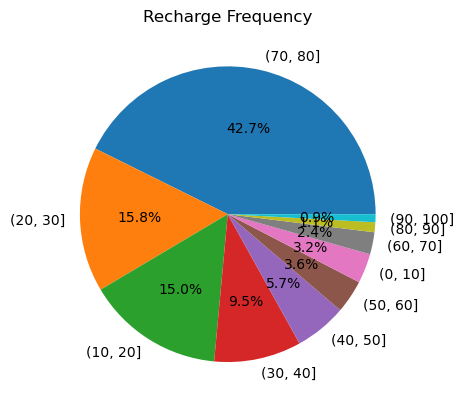

In [77]:
# Define the bin edges
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Group the values into bins
binned_counts = pd.cut(df['recharge_frequency'], bins=bin_edges).value_counts()

# Plot the pie chart
plt.figure(16)
binned_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Recharge Frequency')
plt.ylabel('')
plt.show()

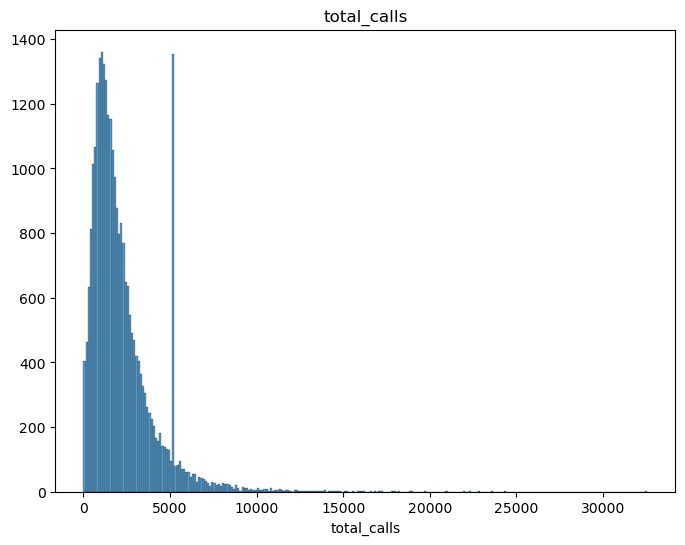

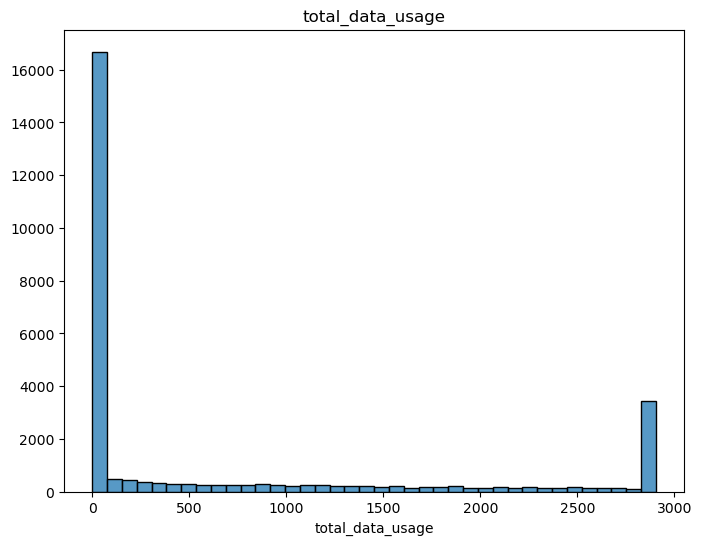

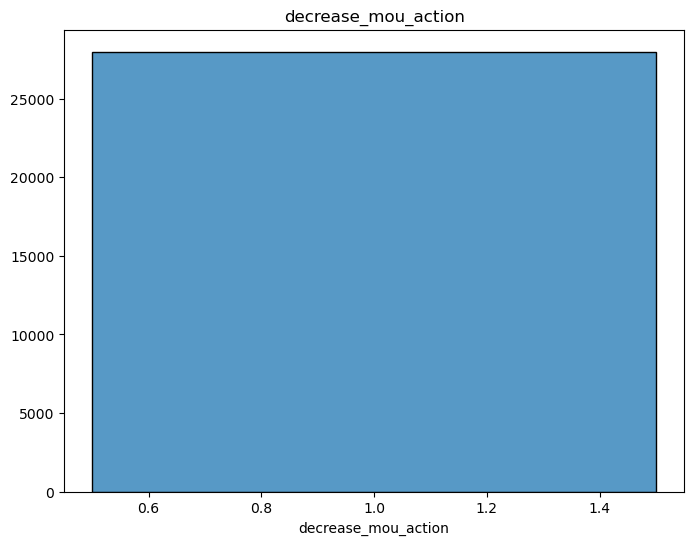

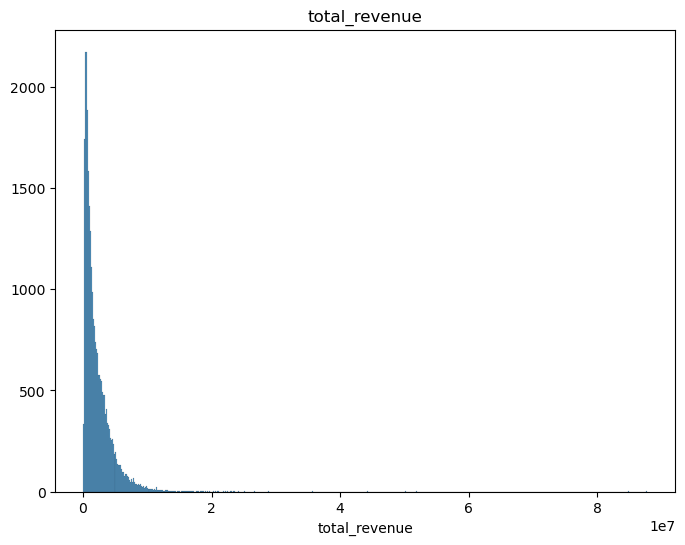

In [78]:
uni_graph = ['total_calls','total_data_usage','decrease_mou_action','total_revenue']

for i in uni_graph:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[i])
    plt.title(i)
    plt.ylabel('')
    plt.show()

# Bivariate Analysis

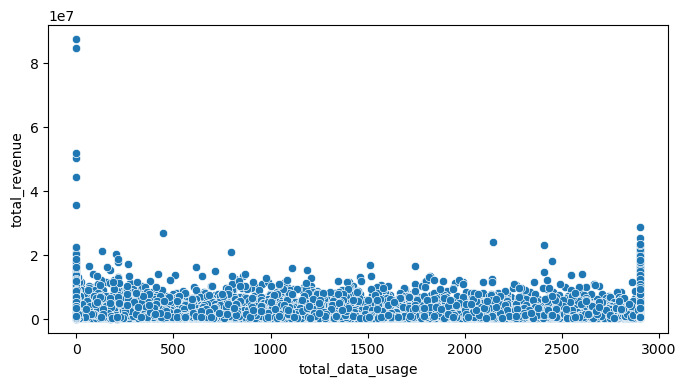

In [79]:
plt.figure(figsize=(8,4))
sns.scatterplot(y=df["total_revenue"],x=df["total_data_usage"])
plt.show()

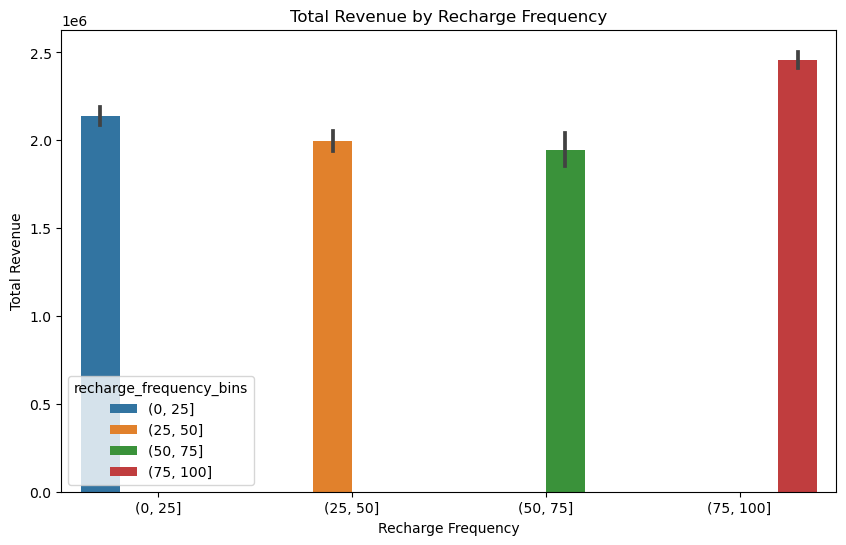

In [80]:
plt.figure(figsize=(10, 6))
bins = [0, 25, 50, 75, 100]
df['recharge_frequency_bins'] = pd.cut(df['recharge_frequency'], bins)
sns.barplot(x=df['recharge_frequency_bins'],y=df['total_revenue'], hue=df['recharge_frequency_bins'])
plt.title('Total Revenue by Recharge Frequency')
plt.xlabel('Recharge Frequency')
plt.ylabel('Total Revenue')
plt.show()


# Multivariate Analysis

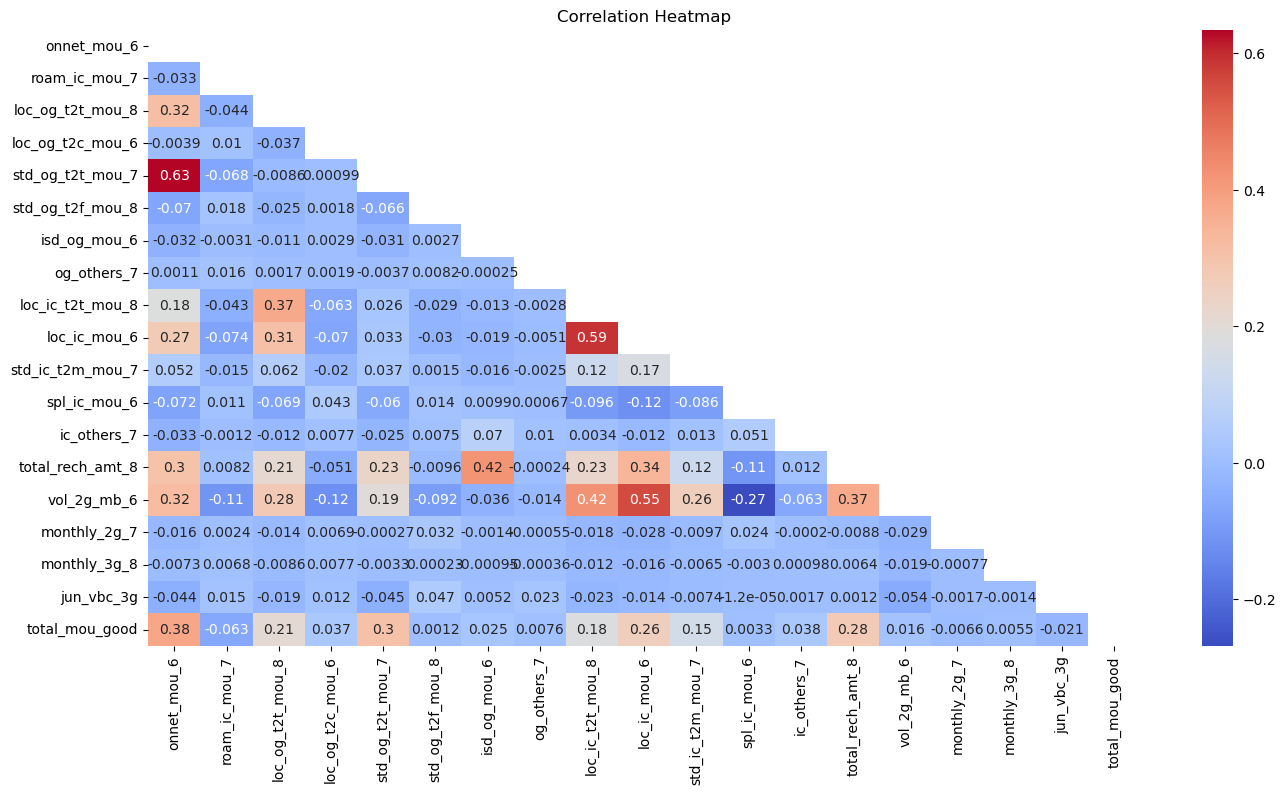

In [81]:
plt.figure(figsize=(16, 8))
correlation_matrix = df[['mobile_number', 'onnet_mou_6', 'roam_ic_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2c_mou_6', 'std_og_t2t_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'og_others_7', 'loc_ic_t2t_mou_8', 'loc_ic_mou_6', 'std_ic_t2m_mou_7', 'spl_ic_mou_6', 'ic_others_7', 'total_rech_amt_8', 'vol_2g_mb_6', 'monthly_2g_7', 'monthly_3g_8', 'jun_vbc_3g', 'total_mou_good']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

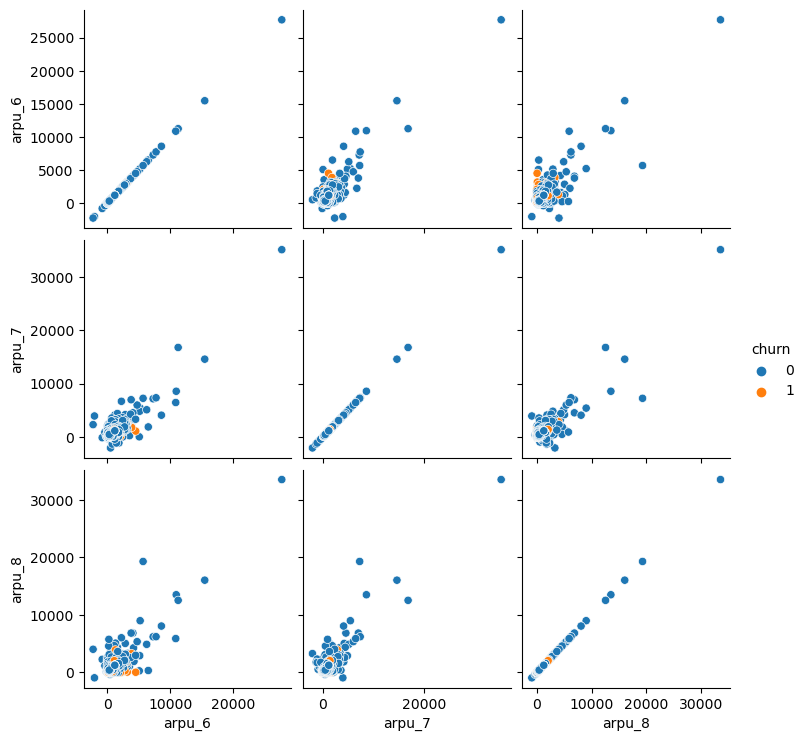

In [82]:
sns.pairplot(data=df[['arpu_6','arpu_7','arpu_8','churn']], hue='churn', diag_kind=None)
plt.show()

<Figure size 1600x800 with 0 Axes>

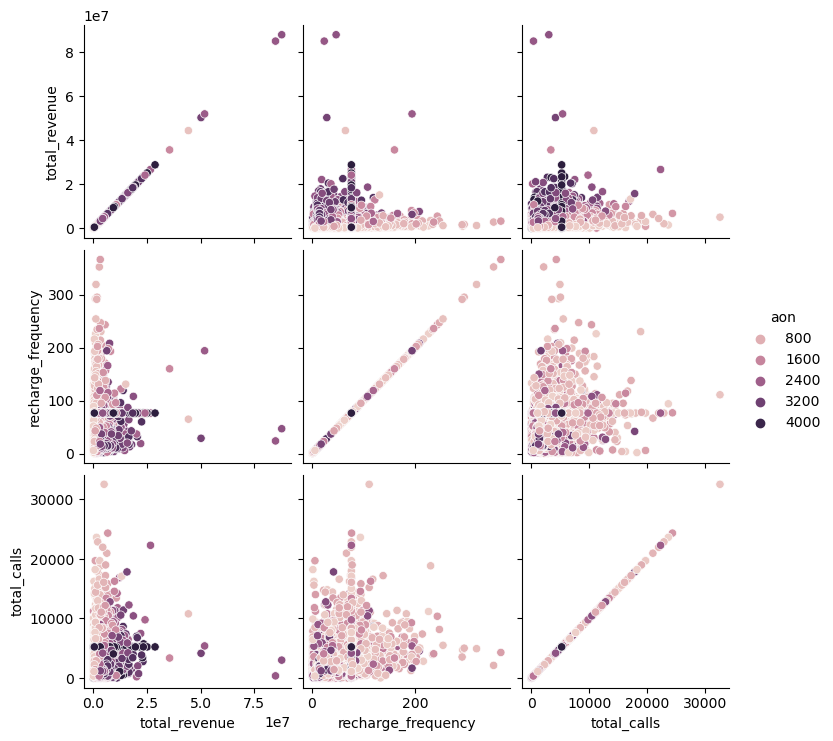

In [83]:
plt.figure(figsize=(16,8))
sns.pairplot(data=df[['total_revenue','recharge_frequency','total_calls','aon']], hue='aon', diag_kind=None)
plt.show()

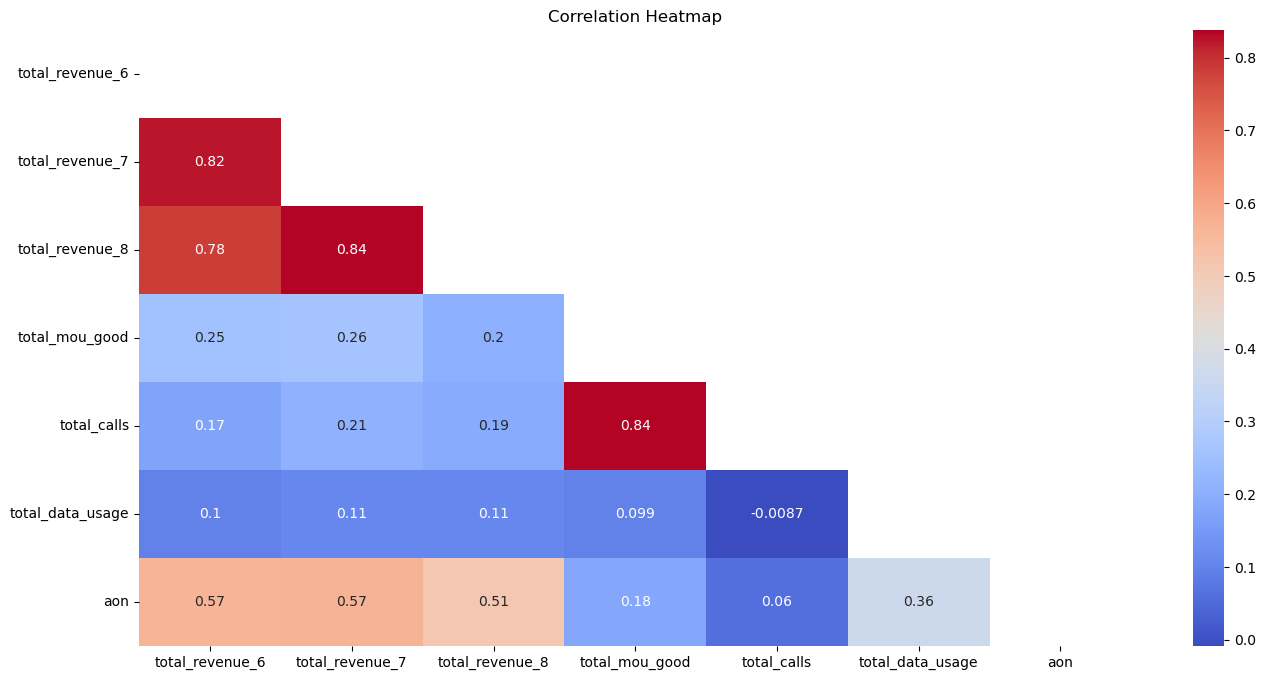

In [84]:
plt.figure(figsize=(16, 8))

correlation_matrix1 = df[['total_revenue_6', 'total_revenue_7', 'total_revenue_8', 'total_mou_good', 'total_calls', 'total_data_usage', 'aon']].corr()

mask = np.triu(np.ones_like(correlation_matrix1, dtype=bool))

sns.heatmap(correlation_matrix1, mask=mask, cmap='coolwarm', annot=True)

plt.title('Correlation Heatmap')

plt.show()



In [85]:
# Dropping those Derive column which are not usefull for further analysis
drop_cols = ['total_mou_good_6','total_mou_good_7','total_mou_good','avg_total_mou_action','diff_mou','aon','total_revenue',
             'recharge_frequency','total_data_usage','total_calls','mobile_number','avg_rech_amt','total_revenue_6', 'total_revenue_7', 
             'total_revenue_8','recharge_frequency_bins','decrease_mou_action','tenure']

df = df.drop(drop_cols, axis=1)

df.head(5)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
8,109.0,0.0,0.0,0.0,378.721,492.223,137.362,818.125,851.0725,742.48,...,0.0,0.0,0.0,0.0,0.0,21.95,8.0625,0.00,0.0,0
13,109.0,0.0,0.0,0.0,492.846,205.671,593.260,501.760,108.3900,534.24,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0000,0.00,0.0,0
16,109.0,0.0,0.0,0.0,430.975,299.869,187.894,50.510,74.0100,70.61,...,0.0,0.0,0.0,0.0,0.0,0.00,2.4500,21.89,0.0,0
17,109.0,0.0,0.0,0.0,690.008,18.980,25.499,1185.910,9.2800,7.79,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0000,0.00,0.0,0
21,109.0,0.0,0.0,0.0,514.453,597.753,637.760,102.410,132.1100,85.14,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0000,0.00,0.0,0


In [86]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

 Preprocessing data

In [87]:
# change churn to numeric
df['churn'] = pd.to_numeric(df['churn'])

# Train-Test Split

In [88]:
# divide data into train and test
X = df.drop("churn", axis = 1)
y = df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [89]:
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(6998,)

In [90]:
# SMOTE method

# PCA

In [91]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [92]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [93]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       19.94
1       26.72
2       31.19
3       35.58
4       38.89
        ...  
129    100.00
130    100.00
131    100.00
132    100.00
133    100.00
Length: 134, dtype: float64


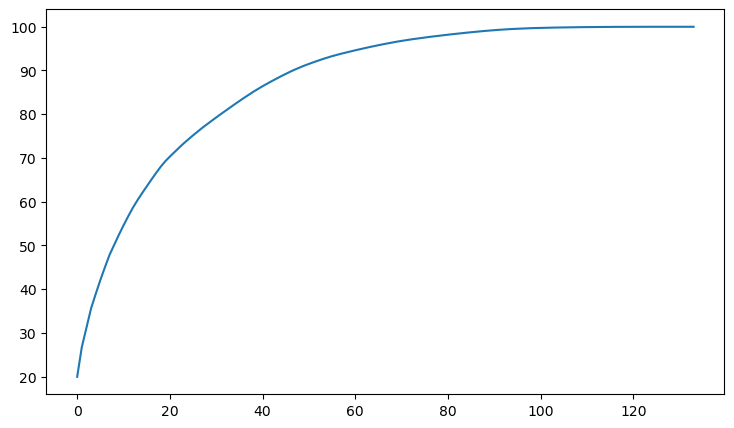

In [94]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

60 components explain 90% variance

~ 80 components explain 95% variance

# PCA AND LOGISTIC REGRESSION

In [95]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [96]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8294669651788692

# Evaluate on Test Data Set

In [97]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5699 1062]
 [  56  181]]
Sensitivity: 	0.76
Specificity: 	0.84
AUC:    	 0.87


# Hyperparameter tuning - PCA and Logistic Regression

In [98]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.966084
1    0.033916
Name: churn, dtype: float64

In [99]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [100]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [101]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.807175,0.057916,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,2.418404,0.059565,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,2.504135,0.053759,0.067195,0.012998,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.848606,0.837752,0.863302,0.874087,0.861721,0.857094,0.012608,2
3,3.648912,0.467985,0.096854,0.023505,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.849955,0.840225,0.865962,0.881759,0.861388,0.859858,0.014162,1
4,2.797067,0.099894,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
5,3.222187,0.168966,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
6,3.973086,0.172633,0.097626,0.024312,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.848184,0.837764,0.864386,0.872396,0.858132,0.856173,0.012142,6
7,5.324354,0.261927,0.106070,0.006110,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.848197,0.839592,0.867012,0.876452,0.851963,0.856643,0.013296,4
8,3.053361,0.062124,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,5.143663,0.625003,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24


In [102]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.859857770327296
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [103]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6425  336]
 [  99  138]]
Sensitivity: 	0.58
Specificity: 	0.95
AUC:    	 0.87


# Random Forest

In [104]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [105]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [106]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9210618943318168
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [107]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6734   27]
 [ 170   67]]
Sensitivity: 	0.28
Specificity: 	1.0
AUC:    	 0.91


# Poor sensitivity. The best model is PCA along with Logistic regression.

# ii) Choosing best features

In [108]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

12


In [109]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.6s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       oob_score=True, random_state=4, verbose=1)

In [110]:
# OOB score
rf_model.oob_score_

0.9675129805173153

In [111]:
len(X_train.columns)

134

In [112]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[6727   34]
 [ 185   52]]
Sensitivity: 	0.22
Specificity: 	0.99
ROC:    	 0.92


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [113]:
# SMOTE METHOD

In [114]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Fit the model on the resampled data
model.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

# Feature Importance

In [115]:
# predictors
features = df.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,roam_ic_mou_8,9.719464
1,roam_og_mou_8,7.505545
2,loc_ic_mou_8,5.640989
3,total_og_mou_8,5.525602
4,total_ic_mou_8,4.943445
...,...,...
129,std_og_t2c_mou_8,0.000000
130,vol_3g_mb_6,0.000000
131,loc_og_t2o_mou,0.000000
132,std_ic_t2o_mou_6,0.000000


In [116]:
# Filter features with importance percentage greater than 3
selected_features = feature_importance[feature_importance['importance_percentage'] > 3]['variables'].tolist()

# Create a new dataframe with selected features
selected_feature_importance = feature_importance[feature_importance['variables'].isin(selected_features)]

# Store the selected_feature_importance dataframe
selected_feature_importance.to_csv('selected_feature_importance.csv', index=False)

In [117]:
# Store the selected_feature_importance dataframe
selected_feature_importance

,variables,importance_percentage
0,roam_ic_mou_8,9.719464
1,roam_og_mou_8,7.505545
2,loc_ic_mou_8,5.640989
3,total_og_mou_8,5.525602
4,total_ic_mou_8,4.943445
5,loc_ic_t2m_mou_8,4.498275
6,loc_og_t2m_mou_8,4.140944
7,loc_og_mou_8,3.855074


In [118]:
top_features = feature_importance.head(30)['variables'].tolist()

In [119]:
selected_features_df = df[top_features + ['churn']]


In [120]:
from sklearn.model_selection import train_test_split

X = selected_features_df.drop('churn', axis=1)
y = selected_features_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [121]:
# Example using Random Forest
from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)


RandomForestClassifier()

In [122]:
# Example using accuracy as the evaluation metric
from sklearn.metrics import accuracy_score

y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9674941953920343


In [123]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [124]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [125]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [126]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

# Extracting top 30 features

In [127]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<AxesSubplot:>

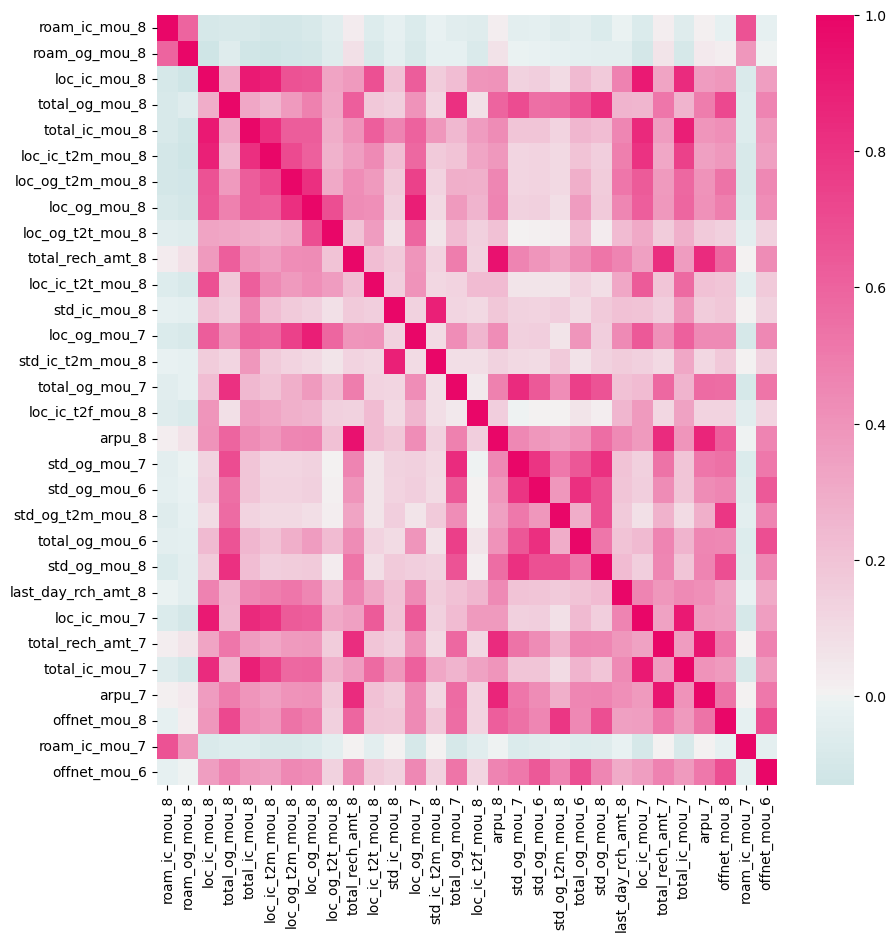

In [128]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [129]:
top_features = ['roam_ic_mou_8', 'roam_og_mou_8', 'loc_ic_mou_8', 'total_og_mou_8', 'total_ic_mou_8', 'loc_ic_t2m_mou_8', 
                'loc_og_t2m_mou_8', 'loc_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [130]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [131]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [132]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8444006276129056
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2'}


### Evaluate the Loaded Model

In [133]:
# predict churn on test data
y_pred_load = model.predict(X_test)

# create onfusion matrix
cm_load = confusion_matrix(y_test, y_pred_load)
print(cm_load)

# check sensitivity and specificity
sensitivity_load, specificity_load, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity_load, 2), "\n", "Specificity: \t", round(specificity_load, 2), sep='')

# check area under curve
y_pred_prob_load = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob_load),2))

[[5261  142]
 [ 100   96]]
Sensitivity: 	0.26
Specificity: 	0.99
ROC:    	 0.82


### Evaluate the trained model object

In [134]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5261  142]
 [ 100   96]]
Sensitivity: 	0.49
Specificity: 	0.97
ROC:    	 0.82


### Extract the intercept and the coefficients from the logistic model 

In [135]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [136]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [137]:
# coefficients
coefficients = logistic_model.coef_.reshape((8, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [138]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,roam_ic_mou_8,roam_og_mou_8,loc_ic_mou_8,total_og_mou_8,total_ic_mou_8,loc_ic_t2m_mou_8,loc_og_t2m_mou_8,loc_og_mou_8
0,-2.084325,0.204448,0.152618,-0.328113,-0.564818,-0.426095,-0.095045,-0.251636,-0.192115


### Based on the final coefficients of the features in your model, we can derive some insights:

1. `roam_ic_mou_8` (Roaming incoming minutes of usage in month 8): The positive coefficient suggests that an increase in roaming incoming minutes is associated with a higher likelihood of churn. This may indicate that customers who engage in more roaming activities are more likely to churn.

2. `roam_og_mou_8` (Roaming outgoing minutes of usage in month 8): Similar to the previous feature, the positive coefficient indicates that higher roaming outgoing minutes are associated with a higher churn probability. This suggests that customers who make more outgoing roaming calls are prone to churn.

3. `loc_ic_mou_8` (Local incoming minutes of usage in month 8): The negative coefficient implies that a decrease in local incoming minutes is associated with a higher likelihood of churn. This may indicate that customers who receive fewer local calls are more likely to churn.

4. `total_og_mou_8` (Total outgoing minutes of usage in month 8): The negative coefficient suggests that a decrease in total outgoing minutes is associated with a higher churn probability. This implies that customers who make fewer outgoing calls in general are more likely to churn.

5. `total_ic_mou_8` (Total incoming minutes of usage in month 8): Similar to the previous feature, the negative coefficient indicates that a decrease in total incoming minutes is associated with a higher churn probability. This suggests that customers who receive fewer incoming calls in general are more likely to churn.

6. `loc_ic_t2m_mou_8` (Local incoming calls within the operator's network in month 8): The negative coefficient implies that a decrease in local incoming calls within the operator's network is associated with a higher likelihood of churn. This suggests that customers who receive fewer calls from other subscribers within the same operator's network are more likely to churn.

7. `loc_og_t2m_mou_8` (Local outgoing calls to other operator's mobiles in month 8): The negative coefficient suggests that a decrease in local outgoing calls to other operator's mobiles is associated with a higher churn probability. This implies that customers who make fewer calls to subscribers on other networks are more likely to churn.

8. `loc_og_mou_8` (Local outgoing minutes of usage in month 8): The negative coefficient indicates that a decrease in local outgoing minutes is associated with a higher likelihood of churn. This suggests that customers who make fewer local outgoing calls are more likely to churn.

Based on these insights, it seems that factors related to roaming activities, reduced call usage (both incoming and outgoing), and reduced network interactions (within and outside the operator's network) are associated with a higher likelihood of churn. Understanding these patterns can help in developing targeted retention strategies to reduce churn and improve customer retention.